# Lesson 8 aka Lesson 14 - Correlations

In [18]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

## Scatterplot

In [4]:
corrs_df = pd.read_csv('/home/scruffy/git/udacity/inferStats/lesson8/Correlations (Lesson 14) - Sheet1.csv')
corrs_df.describe()

/home/scruffy/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,dentist,temp,age,year,pets,eggs,emails,party
count,61.000000,57.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,6.426230,17.670175,36.032787,1976.967213,0.786885,8.475410,404.754098,29.278689
std,4.941184,5.349665,11.694681,11.694681,1.571780,9.206169,1514.990656,34.537000
min,0.000000,6.000000,15.000000,1944.000000,0.000000,0.000000,0.000000,-30.000000
25%,3.000000,NaN,27.000000,1971.000000,0.000000,0.000000,0.000000,2.000000
50%,5.000000,NaN,32.000000,1981.000000,0.000000,6.000000,3.000000,30.000000
75%,10.000000,NaN,42.000000,1986.000000,1.000000,12.000000,25.000000,60.000000
max,25.000000,30.000000,69.000000,1998.000000,7.000000,36.000000,8969.000000,180.000000


In [5]:
age = corrs_df['age']
party = corrs_df['party']
pets = corrs_df['pets']

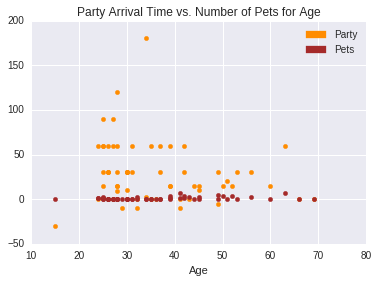

In [20]:
# as one plot
plt.scatter(age, party, color = 'darkorange')
plt.scatter(age, pets, color = 'brown')
plt.title('Party Arrival Time vs. Number of Pets for Age')
plt.xlabel('Age')
party_patch = mpatches.Patch(color='darkorange', label='Party')
pets_patch = mpatches.Patch(color = 'brown', label = 'Pets')
plt.legend(handles = [party_patch, pets_patch])
plt.show()

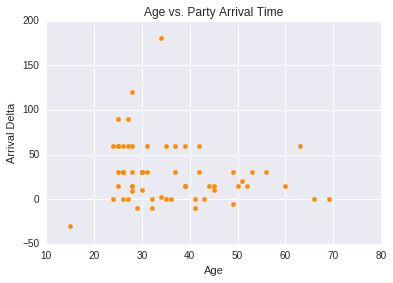

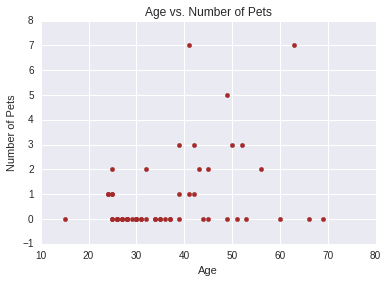

In [14]:
# as seperate plots
plt.scatter(age, party, color = 'darkorange')
plt.title('Age vs. Party Arrival Time')
plt.xlabel('Age')
plt.ylabel('Arrival Delta')
plt.show()
plt.scatter(age, pets, color = 'brown')
plt.title('Age vs. Number of Pets')
plt.xlabel('Age')
plt.ylabel('Number of Pets')
plt.show()

## Calculate r

In [42]:
# correlation for party
party_corr = corrs_df[['age', 'party']].corr()
print party_corr

# correlation for pets
pets_corr = corrs_df[['age', 'pets']].corr()
print pets_corr

            age     party
age    1.000000 -0.164214
party -0.164214  1.000000
           age      pets
age   1.000000  0.375765
pets  0.375765  1.000000


## Find p

In [43]:
party_t = -1.2787
party_dof = 59
party_pval = stats.t.sf(np.abs(party_t), party_dof)*2 

pets_t = 3.1146
pets_dof = 59
pets_pval = stats.t.sf(np.abs(pets_t), pets_dof)*2

print 'p-values: party: {:06.4f}, pets: {:06.4f}'.format(party_pval, pets_pval)

p-values: party: 0.2060, pets: 0.0028


## Add Outlier

In [44]:
outlier_df = pd.DataFrame.from_dict({'dentist': None,
                                   'temp': None,
                                    'age': [20],
                                    'year': None,
                                    'pets': [8],
                                    'eggs': None,
                                    'icons': None,
                                    'emails': None,
                                    'party': None})
outlier_df

,age,dentist,eggs,emails,icons,party,pets,temp,year
0,20,None,None,None,None,None,8,None,None


In [51]:
corrs_df = corrs_df.append(outlier_df, ignore_index = True)
;

''

In [52]:
age = corrs_df['age']
party = corrs_df['party']
pets = corrs_df['pets']

In [53]:
pets_corr = corrs_df[['age', 'pets']].corr()
print pets_corr

           age      pets
age   1.000000  0.231481
pets  0.231481  1.000000


# Problem Set 8

## Quiz 14 Direction of Relationship

In [54]:
gest_df = pd.read_csv('/home/scruffy/git/udacity/inferStats/lesson8/Gestation and Longevity (Problem Set 14) - Sheet1.csv')

In [55]:
gest_df.head()

,Animal,Gestation (days),Longevity (years)
0,Baboon,187,20
1,"Bear, Black",219,18
2,"Bear, Grizzly",225,25
3,"Bear, Polar",240,20
4,Beaver,105,5


In [56]:
gest_df.columns = ['animal', 'gestation', 'longevity']

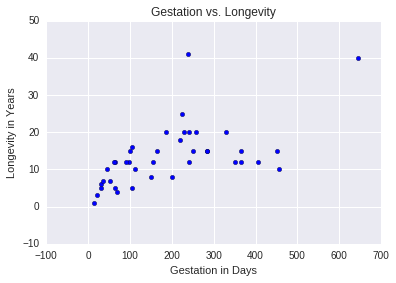

In [59]:
gestation = gest_df['gestation']
longevity = gest_df['longevity']

plt.scatter(gestation, longevity)
plt.title('Gestation vs. Longevity')
plt.xlabel('Gestation in Days')
plt.ylabel('Longevity in Years')
plt.show()

## Quiz 16 Compute r

In [60]:
gest_corr = gest_df[['gestation', 'longevity']].corr()
gest_corr

,gestation,longevity
gestation,1.000000,0.589313
longevity,0.589313,1.000000


## Quiz 17 Coefficient of Determination

In [68]:
t = stats.ttest_ind(gestation, longevity)[0]
print 'T-stat: {:.2f}'.format(t)

linregress = stats.linregress(gestation, longevity)
r_sq = linregress[2]**2
print 'r^2: {:6.4f}'.format(r_sq)

T-stat: 7.87
r^2: 0.3473
